In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import torch
from torch import nn

In [6]:
data = pd.read_csv('covid_custom_dataset.csv')

In [15]:
data.head(n=10)

,dates,cases,day,month,year
0,2020-01-21,282,21,1,2020
1,2020-01-22,314,22,1,2020
2,2020-01-23,581,23,1,2020
3,2020-01-24,846,24,1,2020
4,2020-01-25,1320,25,1,2020
5,2020-01-26,2014,26,1,2020
6,2020-01-27,2798,27,1,2020
7,2020-01-28,4593,28,1,2020
8,2020-01-29,6065,29,1,2020
9,2020-01-30,7818,30,1,2020


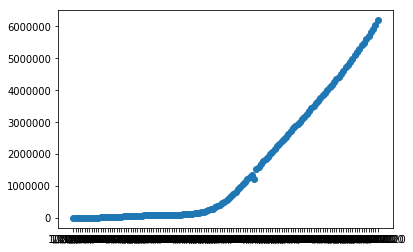

In [11]:
x = data['dates']
y = data['cases']
x = x.to_numpy()
y = y.to_numpy()
plt.scatter(x,y)
plt.show()

In [14]:
data['dates'] = pd.to_datetime(data['dates'])
data['day'] = data['dates'].dt.day
data['month'] = data['dates'].dt.month
data['year'] = data['dates'].dt.year


In [17]:
data = data.drop(columns='dates')
data = data[['year','month','day','cases']]
data.head(n=10)

,year,month,day,cases
0,2020,1,21,282
1,2020,1,22,314
2,2020,1,23,581
3,2020,1,24,846
4,2020,1,25,1320
5,2020,1,26,2014
6,2020,1,27,2798
7,2020,1,28,4593
8,2020,1,29,6065
9,2020,1,30,7818


In [20]:
x = data[['year','month','day']]
y = data[['cases']]
x = x.to_numpy()
y = y.to_numpy()

In [21]:
print(x.shape,y.shape)

(134, 3) (134, 1)


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_data = sc.fit_transform(x)
y_data = sc.fit_transform(y)

D:\anaconda\envs\tensorflow_gpu\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\anaconda\envs\tensorflow_gpu\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\anaconda\envs\tensorflow_gpu\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\anaconda\envs\tensorflow_gpu\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [23]:
x_data

array([[ 0.        , -1.80011756,  0.52389229],
       [ 0.        , -1.80011756,  0.63479524],
       [ 0.        , -1.80011756,  0.74569819],
       [ 0.        , -1.80011756,  0.85660114],
       [ 0.        , -1.80011756,  0.96750409],
       [ 0.        , -1.80011756,  1.07840704],
       [ 0.        , -1.80011756,  1.18930999],
       [ 0.        , -1.80011756,  1.30021293],
       [ 0.        , -1.80011756,  1.41111588],
       [ 0.        , -1.80011756,  1.52201883],
       [ 0.        , -1.80011756,  1.63292178],
       [ 0.        , -1.03435327, -1.69416669],
       [ 0.        , -1.03435327, -1.58326374],
       [ 0.        , -1.03435327, -1.4723608 ],
       [ 0.        , -1.03435327, -1.36145785],
       [ 0.        , -1.03435327, -1.2505549 ],
       [ 0.        , -1.03435327, -1.13965195],
       [ 0.        , -1.03435327, -1.028749  ],
       [ 0.        , -1.03435327, -0.91784605],
       [ 0.        , -1.03435327, -0.8069431 ],
       [ 0.        , -1.03435327, -0.696

In [24]:
y_data

array([[-0.85468665],
       [-0.85466993],
       [-0.85453047],
       [-0.85439205],
       [-0.85414447],
       [-0.85378197],
       [-0.85337247],
       [-0.85243488],
       [-0.85166601],
       [-0.85075037],
       [-0.84970153],
       [-0.84859054],
       [-0.84723039],
       [-0.84575011],
       [-0.84405828],
       [-0.84200866],
       [-0.84006455],
       [-0.83839048],
       [-0.83661195],
       [-0.83521629],
       [-0.83365139],
       [-0.83231997],
       [-0.83123979],
       [-0.83028602],
       [-0.82921211],
       [-0.82841451],
       [-0.82774749],
       [-0.81752446],
       [-0.81653047],
       [-0.81555266],
       [-0.81526852],
       [-0.81473522],
       [-0.81419983],
       [-0.81366862],
       [-0.81339701],
       [-0.81292273],
       [-0.81246831],
       [-0.81184935],
       [-0.81114002],
       [-0.81022542],
       [-0.8093197 ],
       [-0.80837377],
       [-0.80736985],
       [-0.80620975],
       [-0.80504339],
       [-0

In [25]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()
        
        self.hidden_dim=hidden_dim

        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        
        # last, fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)
        
        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        # shape output to be (batch_size*seq_length, hidden_dim)
        r_out = r_out.view(-1, self.hidden_dim)  
        
        # get final output 
        output = self.fc(r_out)
        
        return output, hidden


In [26]:
test_rnn = RNN(input_size=3, output_size=1, hidden_dim=10, n_layers=2)

# generate evenly spaced, test data pts

test_input = torch.Tensor(x_data).unsqueeze(0) # give it a batch_size of 1 as first dimension
print('Input size: ', test_input.size())
# test out rnn sizes
test_out, test_h = test_rnn(test_input, None)
test_out = torch.Tensor(y_data)
print('Output size: ', test_out.size())
print('Hidden state size: ', test_h.size())

Input size:  torch.Size([1, 134, 3])
Output size:  torch.Size([134, 1])
Hidden state size:  torch.Size([2, 1, 10])


In [27]:
test_h

tensor([[[ 0.6258, -0.2371, -0.3751,  0.7452, -0.1380,  0.6508,  0.0873,
           0.1203,  0.4176, -0.6148]],

        [[-0.7145,  0.2411,  0.4029,  0.0569, -0.0812,  0.2531,  0.0970,
          -0.4966,  0.2159, -0.5905]]], grad_fn=<StackBackward>)

In [28]:
# decide on hyperparameters
input_size=3
output_size=1
hidden_dim=32
n_layers=1

# instantiate an RNN
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

# MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01) 

RNN(
  (rnn): RNN(3, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [29]:
# train the RNN
def train(rnn, n_steps, print_every):
    
    # initialize the hidden state
    hidden = None      
    
    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data 

        x = x_data[:-1]
        y = y_data[1:]
        
        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)

        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero gradients
        optimizer.zero_grad()
        # perform backprop and update weights
        loss.backward()
        optimizer.step()

        # display loss and predictions
        if batch_i%print_every == 0:        
            print('Loss: ', loss.item())
            plt.plot(prediction.data.numpy().flatten(), 'b.') # predictions
            plt.show()
    
    return rnn


Loss:  0.002031866926699877


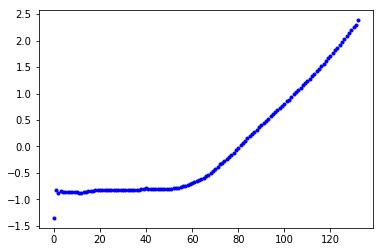

Loss:  0.0001804627536330372


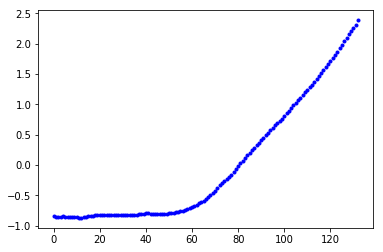

Loss:  0.00018086317868437618


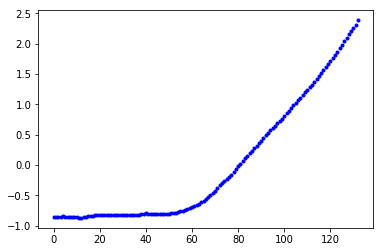

Loss:  0.0001625801232876256


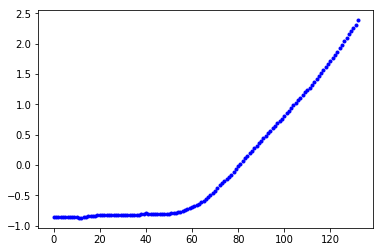

Loss:  0.00018258107593283057


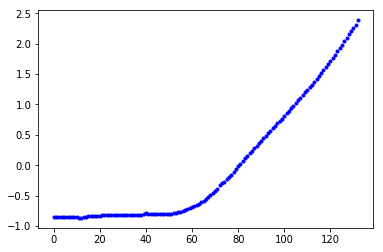

Loss:  0.00012645886454265565


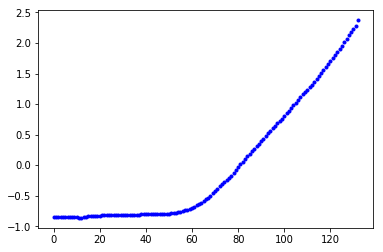

Loss:  0.00012715307821054012


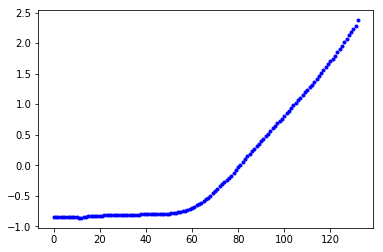

In [34]:
# train the rnn and monitor results
n_steps = 100
print_every = 15

trained_rnn = train(rnn, n_steps, print_every)